# __Project Name__

<h3 align = "Left"> Developing a Transportation Model based on Linear Programming & solve the model by applying Python Programming Language </h3>

# __Project Overview__

<h3 align = "Left"> A Transportation Model is a mathematical model that represents the relationship of the allocation of resources from a set of sources to a set of destinations. The aim of the model is to find the optimal route and volume of transportation, i.e., minimizing the total shipping cost. </h3>



# __Problem Statement__
<h3 align = "Left"> Wireless Widget (WW) Company has six warehouses supplying to eight vendors with their widgets. Each warehouse has a capacity of widgets that cannot be exceeded, and each vendor has a demand for widgets that must be satisfied. The objective is to determine how many widgets to ship from each warehouse to each vendor so as to minimize the total shipping cost. </h3>


### __Diagram of the Transportation Network__
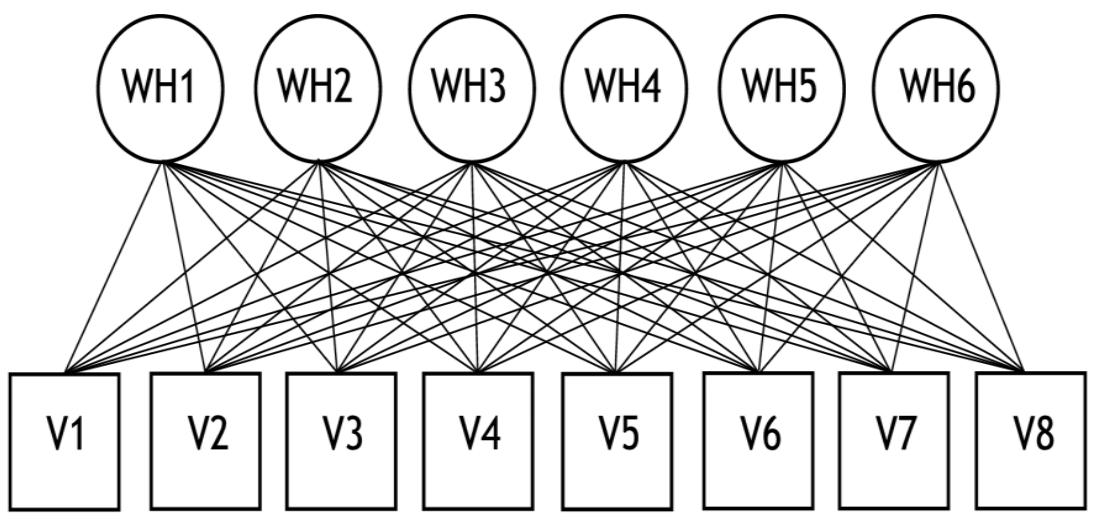

# __Project Completion Steps__

The above problem will be solved by the following steps : 

1. Gathering Relevant Data 
1. Formulation of Mathematical Model
1. Solving the model by implementing Python Programming Language 
    - Importing Necessary Libraries
    - Defining the Model 
    - Listing the value of different parameters
        - Warehouses' Capacity
        - Vendors' Demand
        - Costs of per Unit of Shipment 
    - Defining the Decision Variables 
    - Formulating & Adding the Objective Function into the Model 
    - Formulating the Constraints and Adding them into the model
    - Creating the model solver
    - Results 
        - Finding Optimum value of the objective functon 
        - Finding Optimum values of the decision variables
1. Findings
    - Visualizing the Optimum Routes
    - Visualizing the percentage of Transportation Volume through different routes
    
***

# (1) __Gathering Relevent Data__

<h3 align = "center"> Capacity Data of each warehouse </h3>

| **Warehouse** | **Capacity** |
|:---------:|:--------:|
| 1 | 60 |
|2|55|
|3|51|
|4|43|
|5|41|
|6|52|

<h3 align = "center"> Demand Data of each Vendor </h3>

|**Vendor**|**Demand**|
|:---------:|:--------:|
|1|35|
|2|37|
|3|22|
|4|32|
|5|41|
|6|32|
|7|43|
|8|38|

<h3 align = "center"> Listings of Shipping Costs ($) per Widget for different routes </h3>

|      |**Vendor 1**|**Vendor 2**|**Vendor 3**|**Vendor 4**|**Vendor 5**|**Vendor 6**|**Vendor 7**|**Vendor 8**|
|:----:|:----:|:----:|:----:|:----:|:----:|:----:|:----:|:----:|
|**Warehouse 1**|6|2|6|7|4|2|5|9|
|**Warehouse 2**|4|9|5|3|8|5|8|2|
|**Warehouse 3**|5|2|1|9|7|4|3|3|
|**Warehouse 4**|7|6|7|3|9|2|7|1|
|**Warehouse 5**|2|3|9|5|7|2|6|5|
|**Warehouse 6**|5|5|2|2|8|1|4|3|

# (2) __Formulation of Mathematical Model__

__Decision Variables:__

$ volume_{ij} $ = Number of widgets to be transported from a warehouse i (i = 1, 2,...,6) to a vendor j (j = 1, 2,...,8)


__Objective Function:__

$ Z = Minimize \sum_{ij} (cost)_{ij} * (volume)_{ij} $


__Subject to:__

$ \sum_{j} (volume)_{ij} \leq (capacity)_{i} $

$ \sum_{i} (volume)_{ij} = (demand)_{j} $

$ volume_{ij} \geq 0 $

# (3) __Solving the model by implementing Python Programming Language__

In [1]:
# __Importing Necessary Libraries__

import numpy as np
from pulp import *
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
# __Defining the Model__

model = LpProblem("Transportation Cost Minimization", LpMinimize)

c:\users\jilan\appdata\local\programs\python\python37\lib\site-packages\pulp\pulp.py:1114: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")


In [3]:
# __Listing the values of different parameters__

capacity = [60, 55, 51, 43, 41, 52]
demand = [35, 37, 22, 32, 41, 32, 43, 38]
cost = [6, 2, 6, 7, 4, 2, 5, 9,
       4, 9, 5, 3, 8, 5, 8, 2,
       5, 2, 1, 9, 7, 4, 3, 3,
       7, 6, 7, 3, 9, 2, 7, 1,
       2, 3, 9, 5, 7, 2, 6, 5,
       5, 5, 2, 2, 8, 1, 4, 3]

In [4]:
# __Defining the Decision Variables__

"""
Since each warehouse can ship to each vendor, there are a total of 48 possible shipping paths,
48 seperate variables will be required to represent the shipping amount (No. of widgets) through each paths, 
"""
vol = []
for i in range(1, 7):
    for j in range(1, 9):
        v = "Volume (WareHouse " + str(i) + " to " + "Vendor " + str(j) + ")"  
        vol.append(v)
        
        
# __Assigning the variables into the model__
for i in range(len(vol)):
    vol[i] = LpVariable(vol[i], 0, None, LpInteger)

In [5]:
# __Formulating & Adding the Objective Function into the model__

model += lpSum([vol[i] * cost[i] for i in range(len(vol))])

In [6]:
# __Formulating the Constraints and Adding them into the model__

""" Warehouses' Capacity Constraints """
model += (lpSum([vol[i] for i in range(0, 8)]) <= capacity[0], "Capacity Constraint of WareHouse 1")
model += (lpSum([vol[i] for i in range(8, 16)]) <= capacity[1], "Capacity Constraint of WareHouse 2") 
model += (lpSum([vol[i] for i in range(16, 24)]) <= capacity[2], "Capacity Constraint of WareHouse 3") 
model += (lpSum([vol[i] for i in range(24, 32)]) <= capacity[3], "Capacity Constraint of WareHouse 4") 
model += (lpSum([vol[i] for i in range(32, 40)]) <= capacity[4], "Capacity Constraint of WareHouse 5") 
model += (lpSum([vol[i] for i in range(40, 48)]) <= capacity[5], "Capacity Constraint of WareHouse 6")

""" Vendors' Demand Constraints """
model += (lpSum([vol[i] for i in (0, 8, 16, 24, 32, 40)]) == demand[0], "Demand Constraint of Vendor 1")
model += (lpSum([vol[i] for i in (1, 9, 17, 25, 33, 41)]) == demand[1], "Demand Constraint of Vendor 2")
model += (lpSum([vol[i] for i in (2, 10, 18, 26, 34, 42)]) == demand[2], "Demand Constraint of Vendor 3")
model += (lpSum([vol[i] for i in (3, 11, 19, 27, 35, 43)]) == demand[3], "Demand Constraint of Vendor 4")
model += (lpSum([vol[i] for i in (4, 12, 20, 28, 36, 44)]) == demand[4], "Demand Constraint of Vendor 5")
model += (lpSum([vol[i] for i in (5, 13, 21, 29, 37, 45)]) == demand[5], "Demand Constraint of Vendor 6")
model += (lpSum([vol[i] for i in (6, 14, 22, 30, 38, 46)]) == demand[6], "Demand Constraint of Vendor 7")
model += (lpSum([vol[i] for i in (7, 15, 23, 31, 39, 47)]) == demand[7], "Demand Constraint of Vendor 8")

In [10]:
# __Creating Model Solver__
model.solve()

# __Creating Results__
print(model.name, "\n", "="*30, "\n")

# __Status of the Model__ 
print("Model Status : ", model.status,",", LpStatus[model.status], "\n")

# __Value of the Objective Function__
print("Minimum Cost of Transportation = ", model.objective.value(),"\n")

# __Optimum values of variables__
transport_route = []
transport_volume = []
for var in model.variables():
    print(var.name, "=", var.value())
    if var.value() > 0:
        transport_route.append(var.name)
        transport_volume.append(var.value())

# # __Optimum values of the Slack Variables__ 
# for name, constraint in model.constraints.items():
#     print("Slack Variable ", name, ":", constraint.value())

Transportation_Cost_Minimization 

Model Status :  1 , Optimal 

Minimum Cost of Transportation =  664.0 

Volume_(WareHouse_1_to_Vendor_1) = 0.0
Volume_(WareHouse_1_to_Vendor_2) = 19.0
Volume_(WareHouse_1_to_Vendor_3) = 0.0
Volume_(WareHouse_1_to_Vendor_4) = 0.0
Volume_(WareHouse_1_to_Vendor_5) = 41.0
Volume_(WareHouse_1_to_Vendor_6) = 0.0
Volume_(WareHouse_1_to_Vendor_7) = 0.0
Volume_(WareHouse_1_to_Vendor_8) = 0.0
Volume_(WareHouse_2_to_Vendor_1) = 1.0
Volume_(WareHouse_2_to_Vendor_2) = 0.0
Volume_(WareHouse_2_to_Vendor_3) = 0.0
Volume_(WareHouse_2_to_Vendor_4) = 32.0
Volume_(WareHouse_2_to_Vendor_5) = 0.0
Volume_(WareHouse_2_to_Vendor_6) = 0.0
Volume_(WareHouse_2_to_Vendor_7) = 0.0
Volume_(WareHouse_2_to_Vendor_8) = 0.0
Volume_(WareHouse_3_to_Vendor_1) = 0.0
Volume_(WareHouse_3_to_Vendor_2) = 11.0
Volume_(WareHouse_3_to_Vendor_3) = 0.0
Volume_(WareHouse_3_to_Vendor_4) = 0.0
Volume_(WareHouse_3_to_Vendor_5) = 0.0
Volume_(WareHouse_3_to_Vendor_6) = 0.0
Volume_(WareHouse_3_to_Vendor_7

So, the solution of our model is optimal ; which means, the solution satisfies all the constraints and provide the minimum transportation cost ($ 664) from the feasible region.

# (4) __Findings__

__Minimum transportation cost = $ 664__  
This can be obtained if we ship the widgets in the following way :
1. Warehouse_1 to Vendor_2 = 19 widgets
1. Warehouse_1 to Vendor_5 = 41 widgets
1. Warehouse_2 to Vendor_1 = 1  widget
1. Warehouse_3 to Vendor_2 = 11 widgets
1. Warehouse_1 to Vendor_2 = 19 widgets
1. Warehouse_3 to Vendor_7 = 40 widgets
1. Warehouse_4 to Vendor_6 = 5  widgets
1. Warehouse_4 to Vendor_8 = 38 widgets
1. Warehouse_5 to Vendor_1 = 34 widgets
1. Warehouse_5 to Vendor_2 = 7  widgets
1. Warehouse_6 to Vendor_3 = 22 widgets
1. Warehouse_6 to Vendor_6 = 27 widgets
1. Warehouse_6 to Vendor_7 = 3  widgets

So, from 48 possible paths, only 13 paths will be used for optimum allocation of widgets.
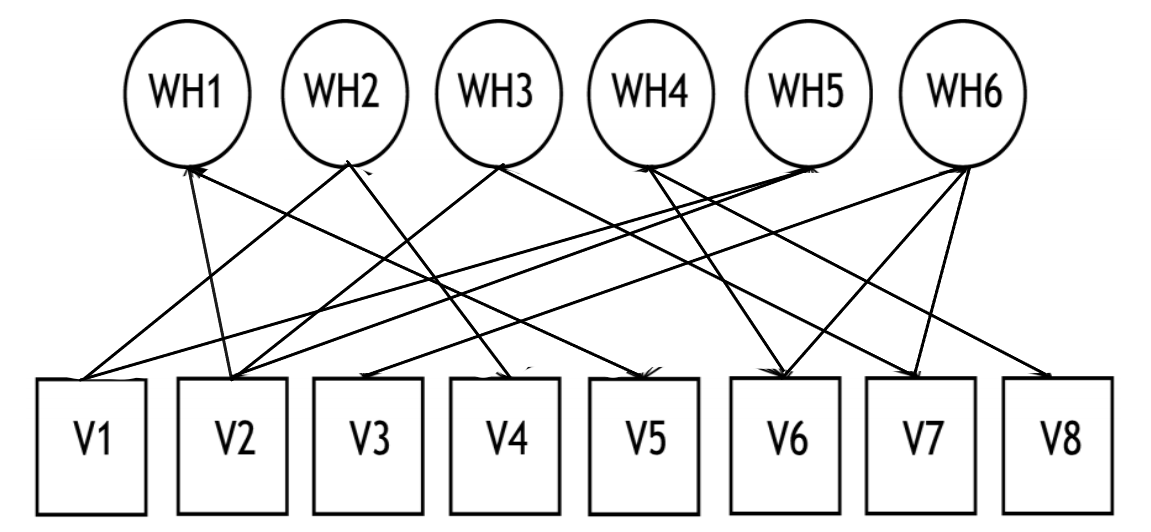

## __Visualizing the transportation volume of different routes__

In [8]:
transport_volume_percent = []
for i in transport_volume:
    transport_volume_percent.append(round(i*100 / sum(transport_volume), 2))
    
transport_volume_percent = pd.Series(transport_volume_percent)

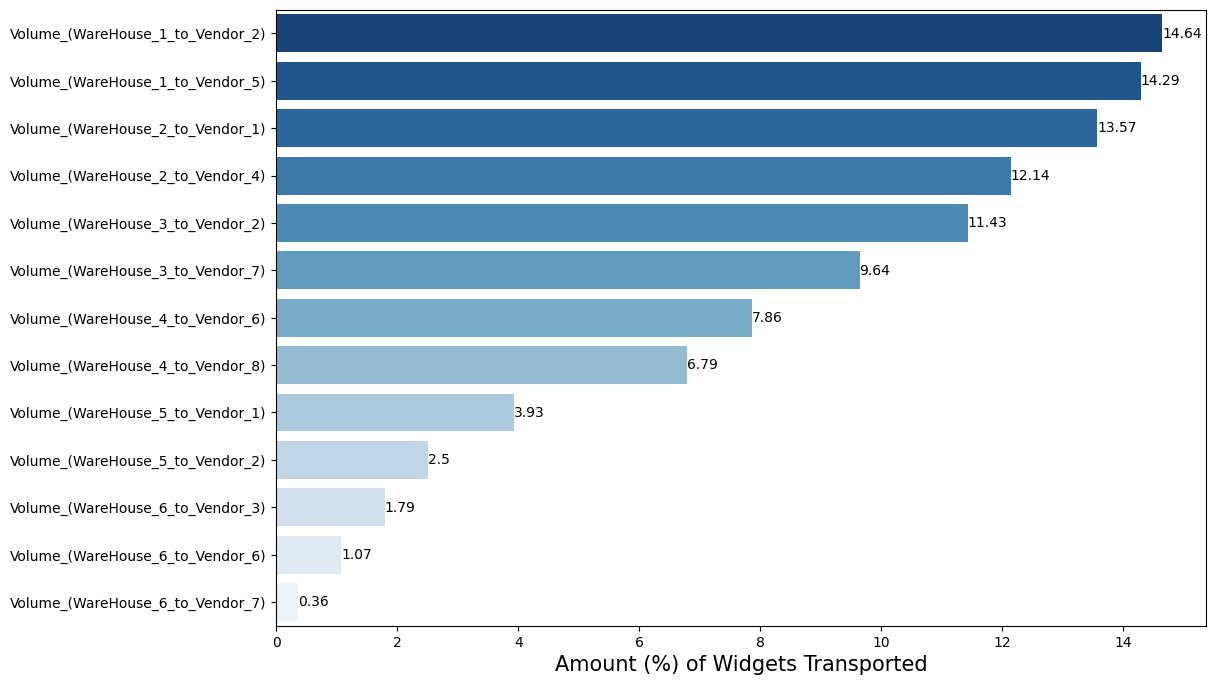

In [9]:
plt.figure(figsize = (12, 8))
ax = sns.barplot(x = transport_volume_percent.sort_values(ascending = False), y = transport_route, 
                 orient = 'h', palette = 'Blues_r')
ax.bar_label(ax.containers[0])
plt.xlabel("Amount (%) of Widgets Transported", size = 15);

From the above chart it is obvious that, for optimum transportation : 
- about 30% of the widgets have to be transported from the Warehouse No. 1.
- about 25% of the widgets have to be transported from the Warehouse No. 2. 
- Warehouse No. 3 will contribute about 20% of the total transportation. 
- Warehouse No. 6 supply to the most No. of vendors (3). Each of the rest 5 warehouses supply to 2 vendors. 